PROYECTO CON DATASET EN BASE A LA DEPRESIÓN, ENFERMEDAD MENTAL QUE AFECTA MILLONES DE PERSONAS, ANALIZAREMOS EDAD, GÉNERO, MAYOR GÉNERO AFECTADO, ESTILOS DE VIDA ETC.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Depression Professional Dataset (1).csv to Depression Professional Dataset (1).csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Vamos a cargar el archivo
df = pd.read_csv("Depression Professional Dataset (1).csv")
# Mostrar las primeras filas para verificar columnas
print(df.head())
print(df.columns)

   Gender  Age  Work Pressure  Job Satisfaction Sleep Duration Dietary Habits  \
0  Female   37            2.0               4.0      7-8 hours       Moderate   
1    Male   60            4.0               3.0      5-6 hours      Unhealthy   
2  Female   42            2.0               3.0      5-6 hours       Moderate   
3  Female   44            3.0               5.0      7-8 hours        Healthy   
4    Male   48            4.0               3.0      7-8 hours       Moderate   

  Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                    No           6                 2   
1                                   Yes           0                 4   
2                                    No           0                 2   
3                                   Yes           1                 2   
4                                   Yes           6                 5   

  Family History of Mental Illness Depression  
0                         

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   int64  
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   int64  
 5   Dietary Habits                         2054 non-null   int64  
 6   Have you ever had suicidal thoughts ?  2054 non-null   int64  
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   int64  
 10  Depression                             2054 non-null   int64  
dtypes: f

In [13]:
df.describe()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.518987,42.171860,3.021908,3.015093,1.490750,1.015579,0.481500,5.930867,2.978578,0.490750,0.098832
std,0.499761,11.461202,1.417312,1.418432,1.106005,0.823871,0.499779,3.773945,1.413362,0.500036,0.298508
min,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,35.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,43.000000,3.000000,3.000000,1.000000,1.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.750000,4.000000,4.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,5.000000,5.000000,3.000000,2.000000,1.000000,12.000000,5.000000,1.000000,1.000000


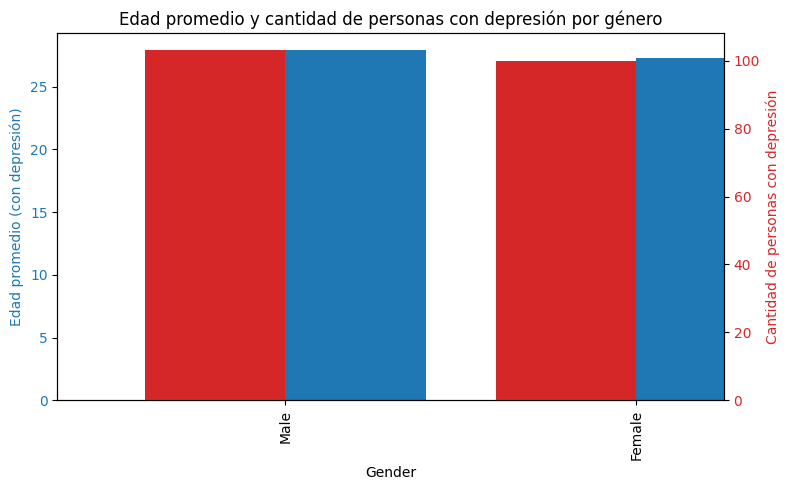

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset (ya debe estar cargado en la variable df)
# Asegurarse de quitar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Filtrar solo personas con depresión
df_depression = df[df['Depression'] == 'Yes']

# Calcular edad promedio por género
avg_age_by_gender = df_depression.groupby('Gender')['Age'].mean()

# Contar cuántas personas con depresión hay por género
count_by_gender = df_depression['Gender'].value_counts()

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(8,5))

# Primer eje (Edad promedio)
color = 'tab:blue'
ax1.set_xlabel('Género')
ax1.set_ylabel('Edad promedio (con depresión)', color=color)
avg_age_by_gender.plot(kind='bar', color=color, ax=ax1, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Segundo eje (cantidad)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cantidad de personas con depresión', color=color)
count_by_gender.plot(kind='bar', color=color, ax=ax2, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Edad promedio y cantidad de personas con depresión por género")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copiamos el DataFrame y limpiamos nombres
df = df.copy()
df.columns = df.columns.str.strip()

# Codificamos variables categóricas
label_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
              'Have you ever had suicidal thoughts ?',
              'Family History of Mental Illness', 'Depression']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Variables independientes (X) y objetivo (y)
X = df.drop('Depression', axis=1)
y = df['Depression']  # 1 = Yes, 0 = No

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Placeholder code for training and prediction (replace with your actual model training)
# Initialize and train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


#Vamos a evaluar el rendimiento
print("Evaluación Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree, target_names=["No Depresión", "Sí Depresión"]))

print("Evaluación Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["No Depresión", "Sí Depresión"]))

Evaluación Árbol de Decisión:
              precision    recall  f1-score   support

No Depresión       0.95      0.95      0.95       368
Sí Depresión       0.60      0.60      0.60        43

    accuracy                           0.92       411
   macro avg       0.78      0.78      0.78       411
weighted avg       0.92      0.92      0.92       411

Evaluación Random Forest:
              precision    recall  f1-score   support

No Depresión       0.95      1.00      0.98       368
Sí Depresión       1.00      0.58      0.74        43

    accuracy                           0.96       411
   macro avg       0.98      0.79      0.86       411
weighted avg       0.96      0.96      0.95       411



In [8]:
# Informacion general del DataSet
# Tamaño y estructura
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ver algunos valores únicos por columna (categorías)
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())


Dimensiones del dataset: (2054, 11)

Tipos de datos:
Gender                                     int64
Age                                        int64
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                             int64
Dietary Habits                             int64
Have you ever had suicidal thoughts ?      int64
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness           int64
Depression                                 int64
dtype: object

Valores nulos por columna:
Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress      

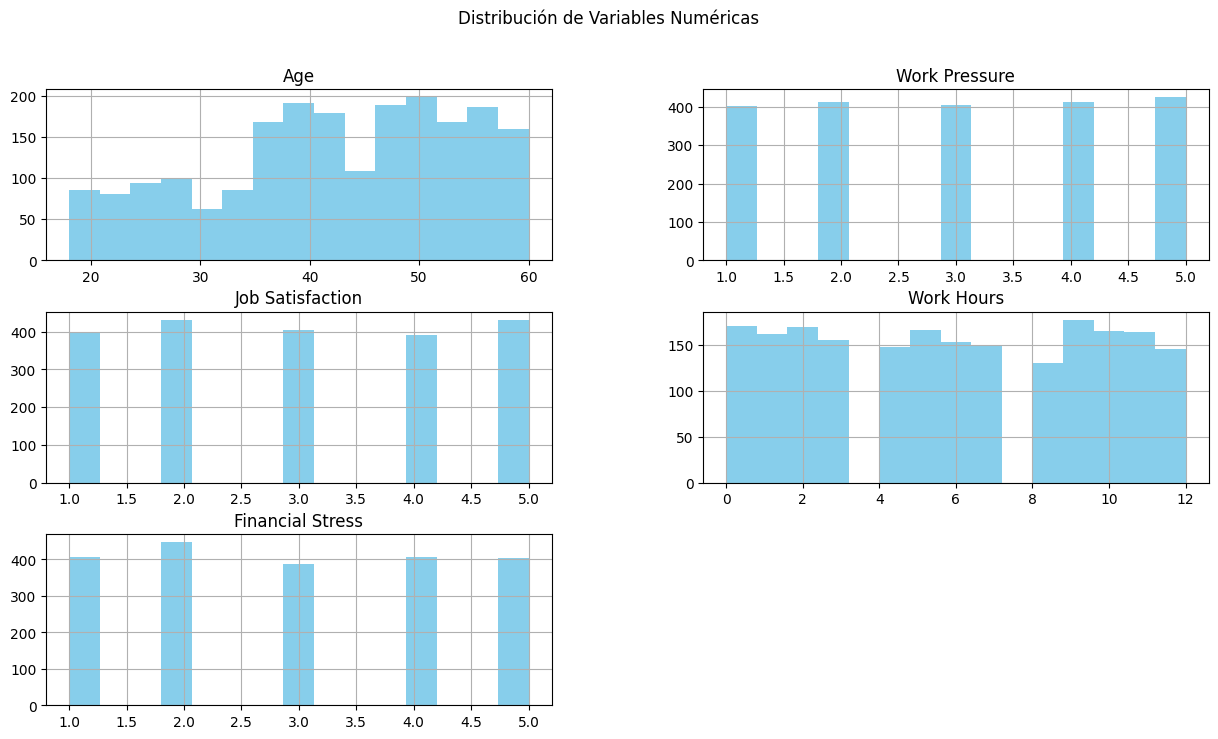

In [9]:
# Miraremos la distribucion de Variables Numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de variables numéricas
num_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']
df[num_cols].hist(bins=15, figsize=(15, 8), color='skyblue')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


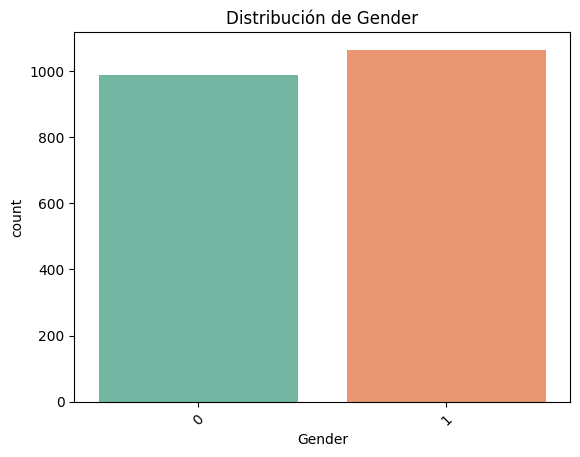

/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


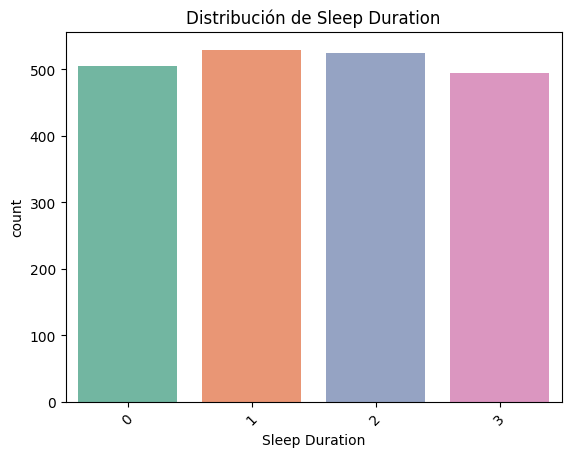

/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


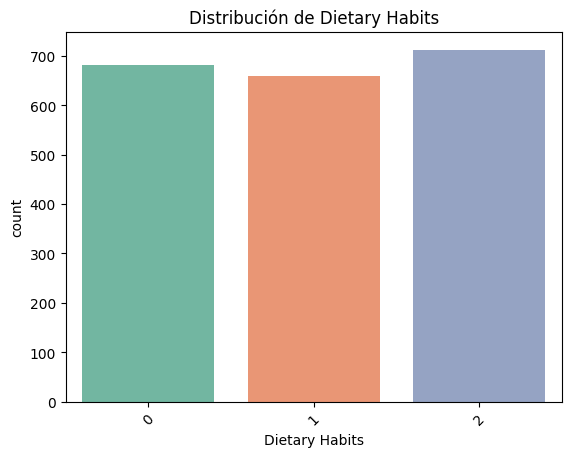

/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


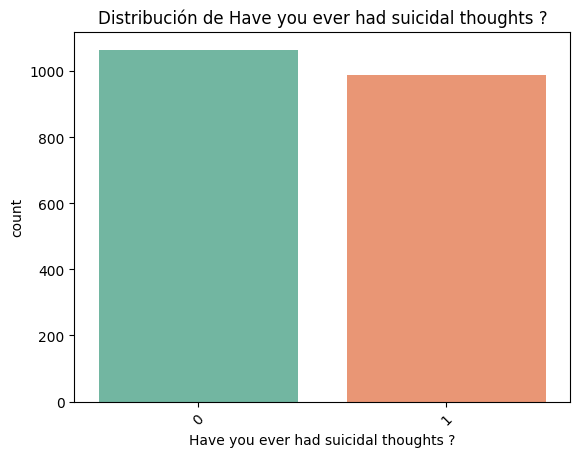

/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


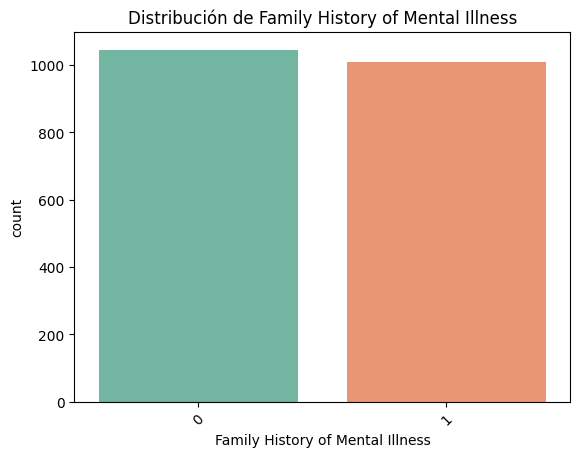

/tmp/ipython-input-11-2471578428.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


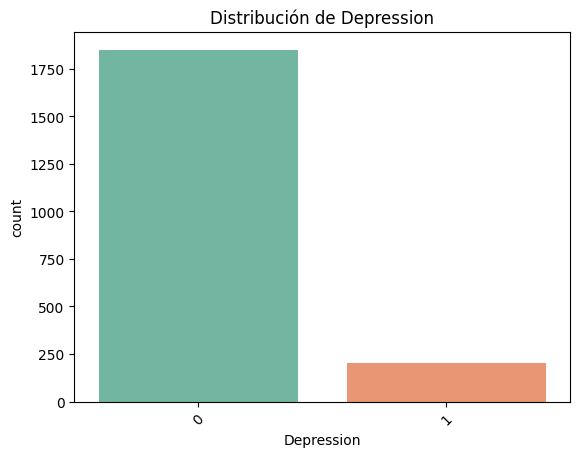

In [11]:
#Distribucion de variables categoricas
cat_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness', 'Depression']

for col in cat_cols:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


In [15]:
#Eliminaremos duplicados
df.drop_duplicates(inplace=True)
df


,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,1,1,0,6,2,0,0
1,1,60,4.0,3.0,0,2,1,0,4,1,0
2,0,42,2.0,3.0,0,1,0,0,2,0,0
3,0,44,3.0,5.0,1,0,1,1,2,1,0
4,1,48,4.0,3.0,1,1,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,2,0,1,2,5,1,0
2050,1,25,1.0,5.0,0,0,1,12,3,1,0
2051,0,23,3.0,1.0,2,1,1,8,3,0,1
2052,0,24,1.0,4.0,2,1,1,4,4,0,0


In [19]:
#Se muestra en la columna de arriba la tabla nueva sin duplicados, ahora miraremos cuantos duplicados teniamos antes
# Número de filas antes de limpiar
original = len(df)

# Número de duplicados
duplicados = df.duplicated().sum()

print(f'Duplicados encontrados: {duplicados}')


Duplicados encontrados: 0


In [21]:
#Corregimos tipo de datos si aplica
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


Gender: int64
Age: int64
Work Pressure: float64
Job Satisfaction: float64
Sleep Duration: int64
Dietary Habits: int64
Have you ever had suicidal thoughts ?: int64
Work Hours: int64
Financial Stress: int64
Family History of Mental Illness: int64
Depression: int64


In [23]:
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts'}, inplace=True)
print(df.columns)

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Suicidal_Thoughts', 'Work Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


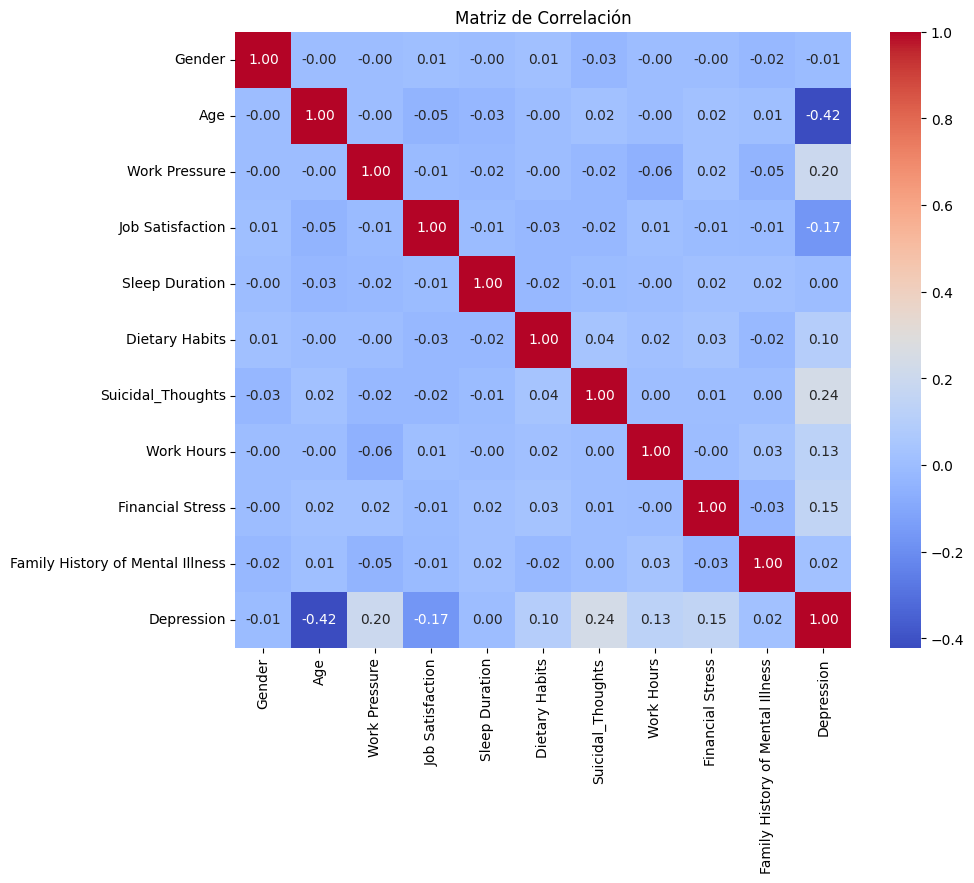

In [25]:
#Variables de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Visualizamos la matriz
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()


In [26]:
#Ahora miraremos solo la variable correlacion "Depresion"
# Correlación de todas las columnas con 'Depression'
correlation_with_depression = correlation_matrix['Depression'].sort_values(ascending=False)

print(correlation_with_depression)


Depression                          1.000000
Suicidal_Thoughts                   0.239176
Work Pressure                       0.197509
Financial Stress                    0.151644
Work Hours                          0.128430
Dietary Habits                      0.096727
Family History of Mental Illness    0.017549
Sleep Duration                      0.000557
Gender                             -0.007687
Job Satisfaction                   -0.166880
Age                                -0.421263
Name: Depression, dtype: float64


In [27]:
print(correlation_with_depression)

Depression                          1.000000
Suicidal_Thoughts                   0.239176
Work Pressure                       0.197509
Financial Stress                    0.151644
Work Hours                          0.128430
Dietary Habits                      0.096727
Family History of Mental Illness    0.017549
Sleep Duration                      0.000557
Gender                             -0.007687
Job Satisfaction                   -0.166880
Age                                -0.421263
Name: Depression, dtype: float64


Regresión logistica para predecir la depresion.🖤🖤

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que 'Suicidal_Thoughts' esté renombrada
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts'}, inplace=True)

# Variables predictoras (todas excepto 'Depression')
X = df.drop(columns=['Depression'])

# Variable objetivo
y = df['Depression']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       368
           1       1.00      0.81      0.90        43

    accuracy                           0.98       411
   macro avg       0.99      0.91      0.94       411
weighted avg       0.98      0.98      0.98       411



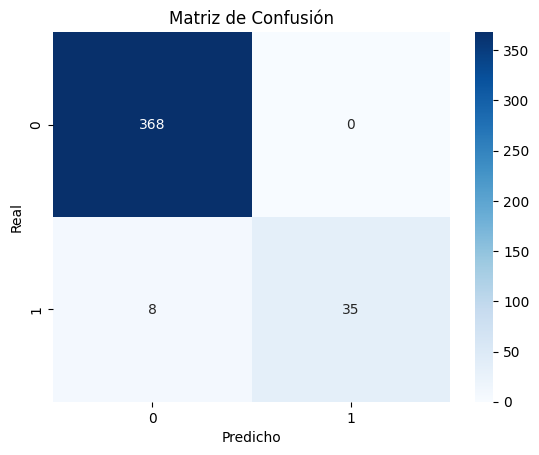

In [31]:
#Evaluaremos el modelo
# Predicciones
y_pred = model.predict(X_test)

# Exactitud
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Reporte detallado
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
